## Data insights, few visualizations

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 200

In [27]:
compfin = pd.read_pickle('compfin.pkl')

In [28]:
compfin.head()

,carteira_2016,organizacao,nome_projeto,area,valor_total,beneficiarios,solicitado_iCSHG,carga_horaria,ativo_2014,ativo_2015,pl_2014,pl_2015,receitas_2014,receitas_2015,despesas_2014,despesas_2015,rec_empresas_2015,rec_fundacao_instituto_2015,rec_pf_2015,rec_governo_2015,rec_outros_2015,d_projetos,d_gerais_e_admin,d_folha_de_pagamento,d_outros,per_capita,beneficiarios_iCSHG,per_capita_por_hora,has_detailed_info,has_consolidated_info
0,0,ABCD,Todos aprendem,Professores,NaN,NaN,NaN,NaN,13380.0,4614.0,12725.0,3831.0,21611.0,1478.0,15019.0,14631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,0,Abrale,Programa de Apoio ao Paciente,Combate à Vulnerabilidade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,2,Abrinq,Creche,Combate à Vulnerabilidade,324052.0,1000.0,147156.0,16.0,34276.0,34491.0,15496.0,15491.0,35047.0,33150.0,32427.0,33008.0,10743701.0,1555494.0,18349678.0,0.0,2500973.0,10800202.0,15217734.0,6588124.0,402220.0,324.052,454.112303,20.25325,True,True
3,0,Acaia,Ateliescola Acaia,Educação Infantil,NaN,NaN,NaN,NaN,43034.0,43929.0,621.0,285.0,93451.0,104931.0,93752.0,105267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,0,Acreditar,Fundo de Negócio “As Marias”,Combate à Vulnerabilidade,NaN,NaN,NaN,NaN,12075.0,11453.0,5613.0,6553.0,NaN,8536.0,NaN,7596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [29]:
print(compfin.columns.values)

['carteira_2016' 'organizacao' 'nome_projeto' 'area' 'valor_total'
 'beneficiarios' 'solicitado_iCSHG' 'carga_horaria' 'ativo_2014'
 'ativo_2015' 'pl_2014' 'pl_2015' 'receitas_2014' 'receitas_2015'
 'despesas_2014' 'despesas_2015' 'rec_empresas_2015'
 'rec_fundacao_instituto_2015' 'rec_pf_2015' 'rec_governo_2015'
 'rec_outros_2015' 'd_projetos' 'd_gerais_e_admin' 'd_folha_de_pagamento'
 'd_outros' 'per_capita' 'beneficiarios_iCSHG' 'per_capita_por_hora'
 'has_detailed_info' 'has_consolidated_info']


## Ideas worth exploring

- general description, totals and aggregated statistics
- boxplots, distributions and correlations
- analisys and insights

## Data chraracteristics:

- [dim] carteira_2016 ~ valor_total | has_detailed_information
- [dim] amount of information per institution ~ valor_total | has_detailed_information
- [dim] field of activity
- calculated metrics
- consolidated finances
- detailed finances

In [30]:
num_org = compfin.groupby(['organizacao']).nome_projeto.count().count()
num_proj = compfin.groupby(['organizacao', 'nome_projeto']).valor_total.count().count()
pro_com_dado = compfin[~compfin.valor_total.isnull()].valor_total.count()

val_tot = compfin['valor_total'].sum()
val_sol = compfin['solicitado_iCSHG'].sum()
val_tot_med = compfin['valor_total'].mean()
val_sol_med = compfin['solicitado_iCSHG'].mean()
num_ben = compfin['beneficiarios'].sum()
num_ben_iCSHG = compfin['beneficiarios_iCSHG'].sum()
# somente 23 tem info de carga horária
hora_per_ben = compfin['carga_horaria'].mean()
med_per_capita = compfin['per_capita'].median()
med_per_capita_hor = compfin['per_capita_por_hora'].median()



print("Número de organizações: %d" % num_org)
print("Número de projetos: %d" % num_proj)
print("Número de projetos com dados de aporte: %d" % pro_com_dado)
print("Valor total dos projetos: R$ %.2f MM" % (val_tot/10**6))
print("O valor solicitado ao iCSHG é de %.2f MM, correspondendo a %d%% do total" % (val_sol/10**6, 100*val_sol/val_tot))
print("Valor médio estimado por projeto atendido: %d Mil" % (val_tot_med/10**3))

print("Valor médio solicitado por projeto atendido: %d Mil" % (val_sol_med/10**3))
print("Número de beneficiados: %d" % num_ben)
print("Número de beneficiados iCSHG: %d" % num_ben_iCSHG)

print("Cada beneficiado recebe em média R$ %d"% (val_tot/num_ben))
print("Em média por beneficiario são investidas %d horas" % hora_per_ben)
# print("O valor mediano por instituição do per capita: %0.2f" % med_per_capita)
print("O valor mediano por instituição do per capita/hr : %0.2f" % med_per_capita_hor)

Número de organizações: 45
Número de projetos: 46
Número de projetos com dados de aporte: 29
Valor total dos projetos: R$ 37.50 MM
O valor solicitado ao iCSHG é de 8.59 MM, correspondendo a 22% do total
Valor médio estimado por projeto atendido: 1293 Mil
Valor médio solicitado por projeto atendido: 296 Mil
Número de beneficiados: 19565
Número de beneficiados iCSHG: 6424
Cada beneficiado recebe em média R$ 1916
Em média por beneficiario são investidas 677 horas
O valor mediano por instituição do per capita/hr : 5.65


In [31]:
# Parece um erro de digitação aqui:
compfin.query("carteira_2016 == 0 and valor_total > 0")

,carteira_2016,organizacao,nome_projeto,area,valor_total,beneficiarios,solicitado_iCSHG,carga_horaria,ativo_2014,ativo_2015,pl_2014,pl_2015,receitas_2014,receitas_2015,despesas_2014,despesas_2015,rec_empresas_2015,rec_fundacao_instituto_2015,rec_pf_2015,rec_governo_2015,rec_outros_2015,d_projetos,d_gerais_e_admin,d_folha_de_pagamento,d_outros,per_capita,beneficiarios_iCSHG,per_capita_por_hora,has_detailed_info,has_consolidated_info
14,0,Camp Pinheiros,Formação para Cidadania,Educação Profissional,650704.0,1700.0,380054.0,260.0,17191.0,19464.0,15676.0,17736.0,21506.0,19537.0,17314.0,17477.0,25104.0,0.0,0.0,30158.0,19481400.0,14091987.0,2357127.0,901702.0,126324.0,382.767059,992.911985,1.472181,True,True


5 maiores projetos

In [32]:
compfin.groupby(['organizacao','nome_projeto','area']).valor_total.sum().nlargest(5)

organizacao           nome_projeto                                           area                     
Espro                 Programa de Formação para o Mundo do trabalho          Educação Profissional        9018268.0
ProA                  ProProfissão                                           Educação Profissional        3740036.0
Banco da Providência  Desenvolvimento Comunitário com foco em gestão social  Combate à Vulnerabilidade    2877420.0
Embraer               Fundo de Bolsas                                        Bolsa                        2798530.0
Liga Solidária        Programa Crianças e Adolescentes                       Educação Complementar        2590312.0
Name: valor_total, dtype: float64

5 maiores aportes

In [33]:
compfin.groupby(['organizacao','nome_projeto','area']).solicitado_iCSHG.sum().nlargest(5)

organizacao              nome_projeto                                   area                     
Espro                    Programa de Formação para o Mundo do trabalho  Educação Profissional        1803654.0
ProA                     ProProfissão                                   Educação Profissional         701257.0
Apaf                     Iluminar                                       Educação Profissional         412800.0
Camp Pinheiros           Formação para Cidadania                        Educação Profissional         380054.0
Aliança de Misericórdia  Creche São Miguel                              Combate à Vulnerabilidade     360526.0
Name: solicitado_iCSHG, dtype: float64

Aportes por área

In [34]:
compfin[compfin.valor_total > 0].groupby(['area']).nome_projeto.count().sort_values(ascending = False)

area
Educação Profissional        10
Combate à Vulnerabilidade     8
Educação Complementar         7
Bolsa                         3
Gestão de OSCs                1
Name: nome_projeto, dtype: int64

In [35]:
#avalio a consistencia da marcação has_detailed_info

# valor_total == 0
#compfin[compfin.valor_total.isnull()].has_consolidated_info.value_counts()
compfin[compfin.valor_total.isnull()].has_detailed_info.value_counts()

False    17
Name: has_detailed_info, dtype: int64

In [36]:
print()
print("Informação financeira agregada (MM): nota-se que há alguns grandes players")

fin_agg = compfin[compfin.has_detailed_info][['ativo_2014', 'ativo_2015', 'pl_2014', 'pl_2015',
         'receitas_2014', 'receitas_2015' ,'despesas_2014',
         'despesas_2015']]/1000 # Odd! Too low! Have to multiply by 1000

fin_agg.describe().round(1)


Informação financeira agregada (MM): nota-se que há alguns grandes players


,ativo_2014,ativo_2015,pl_2014,pl_2015,receitas_2014,receitas_2015,despesas_2014,despesas_2015
count,29.0,28.0,29.0,29.0,29.0,29.0,29.0,29.0
mean,33.0,30.1,28.6,23.9,20.8,22.1,18.3,20.8
std,62.3,57.9,57.7,50.2,38.5,42.4,33.6,38.1
min,0.0,0.9,0.0,0.0,0.2,1.3,0.0,0.3
25%,2.2,3.4,1.2,1.8,3.2,3.7,2.8,3.6
50%,7.0,8.7,3.2,3.2,6.9,7.4,6.1,6.7
75%,19.8,21.4,17.6,17.7,20.0,19.5,12.2,17.5
max,223.2,256.8,209.2,232.6,167.3,187.6,134.9,157.9


In [37]:
print()
print("Receita detalhada (MM): nota-se que há alguns grandes players")

rec_det = compfin[compfin.has_detailed_info][['rec_empresas_2015', 'rec_fundacao_instituto_2015', 'rec_pf_2015', 'rec_governo_2015',
       'rec_outros_2015']]/10**6# Odd! Too low! Have to multiply by 

rec_det.describe().round(1)


Receita detalhada (MM): nota-se que há alguns grandes players


,rec_empresas_2015,rec_fundacao_instituto_2015,rec_pf_2015,rec_governo_2015,rec_outros_2015
count,28.0,29.0,29.0,29.0,29.0
mean,9.6,1.4,1.2,1.9,8.4
std,29.3,4.2,3.5,3.3,25.2
min,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.0,0.0,0.0,1.2
50%,1.4,0.3,0.2,0.4,2.1
75%,3.5,0.9,0.6,1.9,3.2
max,149.2,22.6,18.3,14.3,136.8


In [38]:
print()
print("Despesa detalhada (MM): nota-se que há alguns grandes players")

des_det = compfin[compfin.has_detailed_info][['d_projetos', 'd_gerais_e_admin',
       'd_folha_de_pagamento', 'd_outros']]/10**6 # Odd! Too low! Have to multiply by 

des_det.describe().round(1)


Despesa detalhada (MM): nota-se que há alguns grandes players


,d_projetos,d_gerais_e_admin,d_folha_de_pagamento,d_outros
count,29.0,29.0,29.0,29.0
mean,13.3,3.4,2.4,1.7
std,27.5,7.6,5.5,4.8
min,0.1,0.0,0.0,0.0
25%,2.8,0.2,0.4,0.0
50%,4.6,0.7,0.7,0.1
75%,10.4,2.1,1.6,0.4
max,116.1,37.0,29.2,22.6


- Vale entender outliers em receita
- explorar razao valor_total/solicitado # Há instituições que recebem muito mais do que outras

#### Boxplots, Distributions and correlations

- aprox: 5 outliers, despesas 2014 tem pouca variação

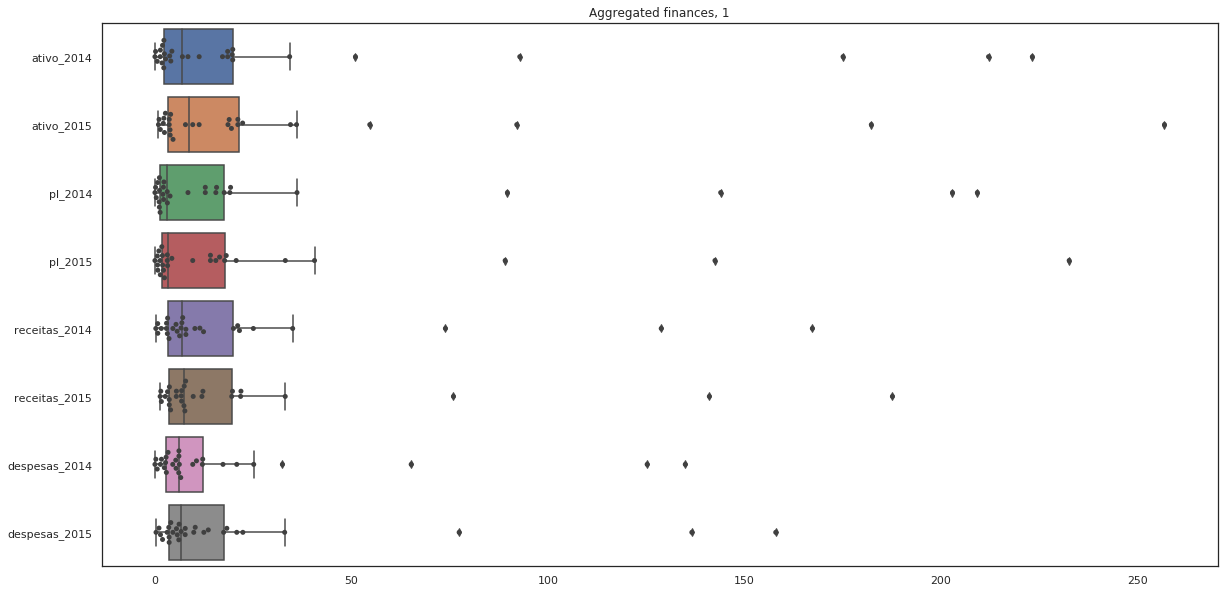

In [19]:
plt.figure(figsize=(20, 10))
plt.title("%s, %d"%("Aggregated finances", 1))
ax = sns.boxplot(data = fin_agg, orient = "h")
ax = sns.swarmplot(data = fin_agg, orient = "h", color=".25")
plt.show()

- receita de fundação e pf com pouca variação, empresas têm maior variação. Receita outros relevante!

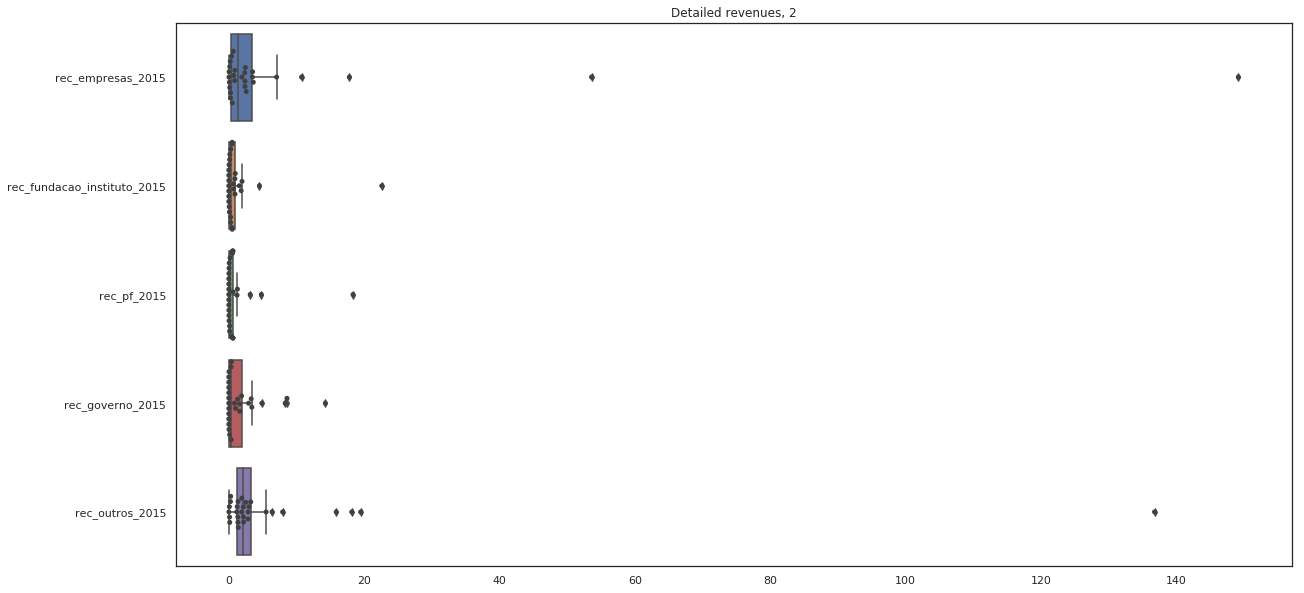

In [20]:
plt.figure(figsize=(20, 10))
plt.title("%s, %d"%("Detailed revenues", 2))
ax = sns.boxplot(data = rec_det, orient = "h")
ax = sns.swarmplot(data = rec_det, orient = "h", color=".25")
plt.show()

- os gastos com projetos são substancialmente maiores do que os demais tipos
- seria interessante clusterizar por % de tipo de gastos

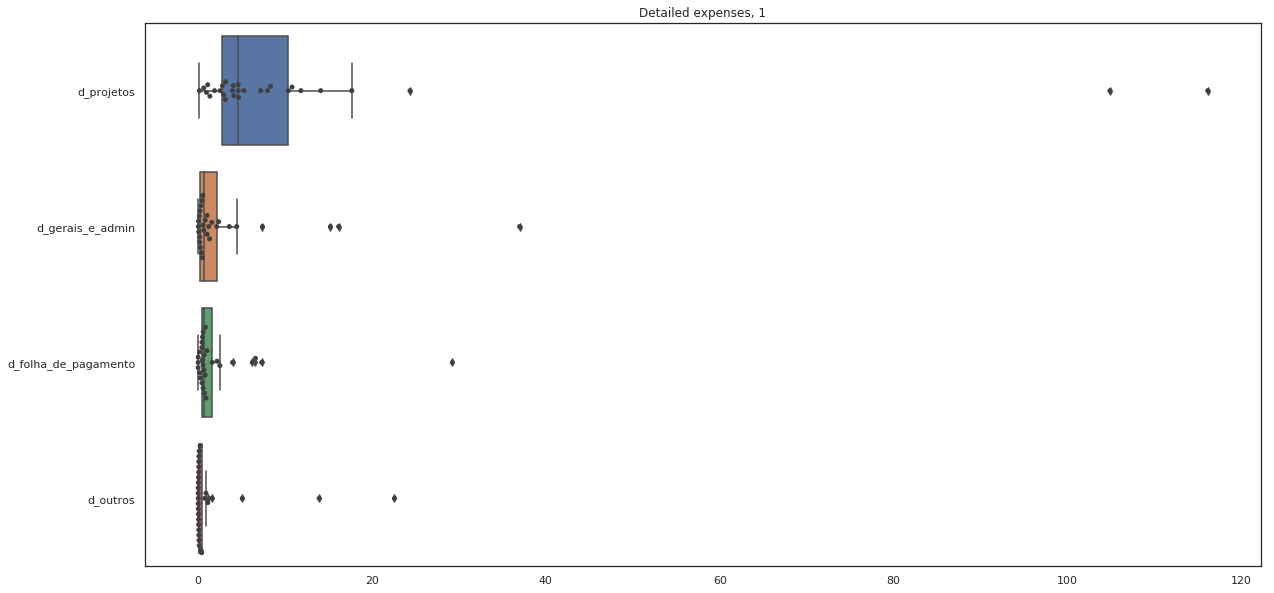

In [22]:
plt.figure(figsize=(20, 10))
plt.title("%s, %d"%("Detailed expenses", 1))
ax = sns.boxplot(data = des_det, orient = "h")
ax = sns.swarmplot(data = des_det, orient = "h", color=".25")
plt.show()

- ainda que haja campos calculados, vale entender as relações que aparecem com força
- por exemplo, parece que surge uma divisão entre governo x solicitado

In [23]:
corr = compfin[compfin.has_detailed_info].corr()

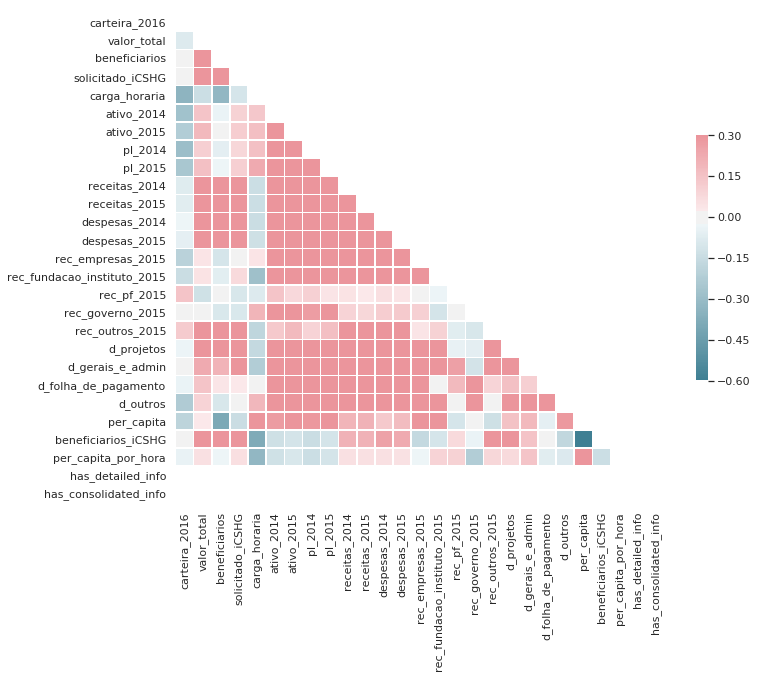

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()